In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

## The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [2]:
data = pd.read_csv('ex1data1.txt', sep=',', names=['Population', 'Profit'])

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
feature = np.array([data['Population']]).reshape(97,1)
m = feature.shape[0]
X = np.hstack((np.ones((m,1)),feature))

In [5]:
y = np.array([data['Profit']]).reshape(m, 1)
theta = np.zeros((X.shape[1], 1))

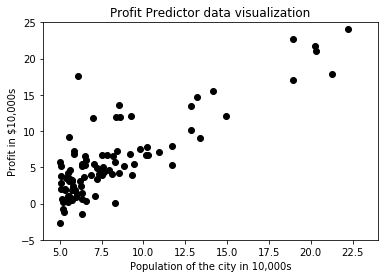

In [6]:
plt.title('Profit Predictor data visualization')
plt.plot(feature, y, 'ro', color='black')
plt.axis([4, 24, -5, 25])
plt.xlabel('Population of the city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [7]:
def compute_cost(X, y, params):
    h = X @ params
    sqr = (h-y) ** 2
    j = (1/(2*m)) * sqr.sum()
    return j

In [8]:
# test_theta = np.array([-1, 2]).reshape(2, 1)
c = compute_cost(X, y, theta)
print(c)

32.072733877455676


In [9]:
def gradient_descent(X, y, params, alpha, iteration):
    j_history = np.zeros((iteration, 1))
    
    for i in range(iteration):
        h = X @ params
        p = (h-y).T
        params = params - ((alpha / m) * (p @ X).T )
        
        j_history[i] = compute_cost(X, y, params)
    return (params, j_history)

In [10]:
t, j = gradient_descent(X, y, theta, 0.01, 1500)

In [11]:
print(f'Cost when theta=[0, 0], {c}\n')
print(f'Theta after 1500 iteration: \n{t}\n\n')

print(f'First 5 cost: \n{j[:5, :]}\n\n')

print(f'Last 5 cost: \n{j[-5:, :]}\n\n')

print(f'Final cost {j[-1, 0]}\n')

Cost when theta=[0, 0], 32.072733877455676

Theta after 1500 iteration: 
[[-3.63029144]
 [ 1.16636235]]


First 5 cost: 
[[6.73719046]
 [5.93159357]
 [5.90115471]
 [5.89522859]
 [5.89009494]]


Last 5 cost: 
[[4.48348155]
 [4.4834581 ]
 [4.48343473]
 [4.48341145]
 [4.48338826]]


Final cost 4.483388256587725



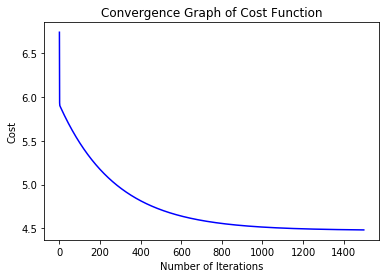

In [12]:
plt.plot(range(len(j)), j, 'b')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [13]:
def predict_value(X, theta):
    return X @ theta

In [14]:
y_new = predict_value(X, t)

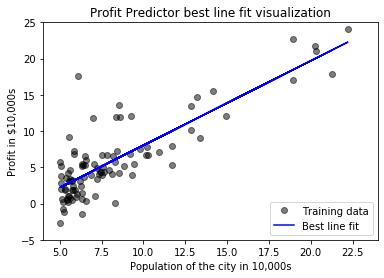

In [15]:
plt.title('Profit Predictor best line fit visualization')
plt.plot(feature, y, 'ro', color='black', alpha=0.5, label='Training data')
plt.plot(feature, y_new, '-', color='blue', label='Best line fit')
plt.axis([4, 24, -5, 25])
plt.legend(loc='lower right')
plt.xlabel('Population of the city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

* For population = 35,000, we predict a profit of 4519.767868 
* For population = 70,000, we predict a profit of 45342.45012
* We assume that this is our correct output.

In [16]:
val = 35000 / 10000
x = np.array([1, val]).reshape(1, 2)


In [17]:
print('For the city with 35,000 population, we predict our profit is = {:.2f}$'.format(predict_value(x, t)[0, 0] * 10000))

For the city with 35,000 population, we predict our profit is = 4519.77$


In [18]:
reg = linear_model.LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# theta from sklearn
t1 = reg.coef_[0,1]
t2 = reg.intercept_[0]
sk_theta = np.array([t2, t1]).reshape(2, 1)
sk_theta

array([[-3.89578088],
       [ 1.19303364]])

In [20]:
print('For the city with 35,000 population, SKlearn predict our profit is = {:.2f}$'.format(predict_value(x, sk_theta)[0,0] * 10000))

For the city with 35,000 population, SKlearn predict our profit is = 2798.37$


In [21]:
sklearn_accuracy = reg.score(X, y) * 100

In [22]:
def our_score(X, y, params):
    h = X @ params
    p = ((y - h) ** 2).sum()
    e = ((y - y.mean()) ** 2).sum()
    score = 1 - (p / e)
    return score

In [23]:
our_accuracy = our_score(X, y, t) * 100

In [24]:
print('SkLearn training accuracy = {:.4f}%\n\nOur training accuracy = {:.4f}%\n'.format(sklearn_accuracy, our_accuracy))

SkLearn training accuracy = 70.2032%

Our training accuracy = 70.1604%

